## Project: Investigate A DataSet NCIS Gun data And Census Data

## Table of Content

• Introduction
• Data Wrangling
• Exploratory Data Analysis
• Conclusions

## INTRODUCTION

This data is based on the federal firearms licences. This is to determine whether the buyer is eligible to procure explosives or firearms. Before a firearm or an explosive is procured, the cashier needs to run a background check via the FBI, to make sure that there isnt't any record of any criminal activity. These FBI however in other states does not include background checks in private gun sales. Nics numbers are accepted wildly as the best proxy for total gun sales.


## Source: https://ipython.readdocs.io/en/stable/interactive/magics.html

## Data Descrption

• We have an Excel Xlx File that we are going to analyze.

## Question(s)for analysis

U.S Census data & Gun data

• How many states do not do pre-permit checks?
• Which privtae state that does not include a background check?
• Which buyer is eligible to procure firearms and explosives?
• Is there any record of any criminal activity from the customers?


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline
df = pd.read_csv
plt.show()

In [4]:
import pandas

## DATA WRANGLING

In [6]:
dataset = pandas.read_excel("gun_data.xlsx")

In [7]:
import pandas as pd

In [8]:
dataset = pd.read_excel("gun_data.xlsx")

In [12]:
dataset.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [13]:
dataset.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


In [61]:
dataset.shape

(86, 52)

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [80]:
dataset.duplicated().sum()

3

In [63]:
dataset.describe

<bound method NDFrame.describe of                                       U.S Census data  \
0                                                Fact   
1        Population estimates, July 1, 2016,  (V2016)   
2   Population estimates base, April 1, 2010,  (V2...   
3   Population, percent change - April 1, 2010 (es...   
4                   Population, Census, April 1, 2010   
..                                                ...   
81                                                 FN   
82                                                NaN   
83                                                  S   
84                                                  X   
85                                                  Z   

                                           Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0                                           Fact Note    Alabama     Alaska   
1                                                 NaN  4,863,300    741.894   
2                                           

In [49]:
import pandas as pd

In [50]:
dataset = pd.read_excel("U.S-Census-data.xlsx")

In [67]:
dataset.head(5)

,U.S Census data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300",741.894,"6,931,071","2,988,248","39,250,017","5,540,545","3,576,452",952.065,...,865454,6651194,"27,862,596","3,051,217",624.594,"8,411,808","7,288,000","1,831,102","5,778,708",585.501
2,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131",710.249,"6,392,301","2,916,025","37,254,522","5,029,324","3,574,114",897.936,...,814195,6346298,"25,146,100","2,763,888",625.741,"8,001,041","6,724,545","1,853,011","5,687,289",563.767
3,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
4,"Population, Census, April 1, 2010",NaN,"4,779,736",710.231,"6,392,017","2,915,918","37,253,956","5,029,196","3,574,097",897.934,...,814180,6346105,"25,145,561","2,763,885",625.741,"8,001,024","6,724,540","1,852,994","5,686,986",563.626


In [95]:
dataset.tail(5)

,U.S Census data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
81,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
dataset.shape

(86, 52)

In [79]:
dataset.duplicated().sum()

3

In [101]:
dataset.isnull()

,U.S Census data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
82,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
83,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
84,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [60]:
dataset.describe

<bound method NDFrame.describe of                                       U.S Census data  \
0                                                Fact   
1        Population estimates, July 1, 2016,  (V2016)   
2   Population estimates base, April 1, 2010,  (V2...   
3   Population, percent change - April 1, 2010 (es...   
4                   Population, Census, April 1, 2010   
..                                                ...   
81                                                 FN   
82                                                NaN   
83                                                  S   
84                                                  X   
85                                                  Z   

                                           Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0                                           Fact Note    Alabama     Alaska   
1                                                 NaN  4,863,300    741.894   
2                                           

In [64]:
dataset.info

<bound method DataFrame.info of                                       U.S Census data  \
0                                                Fact   
1        Population estimates, July 1, 2016,  (V2016)   
2   Population estimates base, April 1, 2010,  (V2...   
3   Population, percent change - April 1, 2010 (es...   
4                   Population, Census, April 1, 2010   
..                                                ...   
81                                                 FN   
82                                                NaN   
83                                                  S   
84                                                  X   
85                                                  Z   

                                           Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0                                           Fact Note    Alabama     Alaska   
1                                                 NaN  4,863,300    741.894   
2                                             

In [65]:
dataset.tail(5)

,U.S Census data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
81,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
dataset.shape

(86, 52)

In [59]:
dataset.info

<bound method DataFrame.info of                                       U.S Census data  \
0                                                Fact   
1        Population estimates, July 1, 2016,  (V2016)   
2   Population estimates base, April 1, 2010,  (V2...   
3   Population, percent change - April 1, 2010 (es...   
4                   Population, Census, April 1, 2010   
..                                                ...   
81                                                 FN   
82                                                NaN   
83                                                  S   
84                                                  X   
85                                                  Z   

                                           Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0                                           Fact Note    Alabama     Alaska   
1                                                 NaN  4,863,300    741.894   
2                                             

## Data Cleaning

In [116]:
dataset.describe()

,U.S Census data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
count,81,29,66,66,66,66,66,66,66,66,...,66,66,66,66,66.000,66,66,66,66,66
unique,81,16,66,65,65,65,64,65,64,65,...,66,65,65,65,64.000,66,66,65,66,65
top,Fact,(c),Alabama,7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,...,South Dakota,0.048,50.40%,2.50%,625.741,Virginia,Washington,1.50%,Wisconsin,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2.000,1,1,2,1,2


In [92]:
dataset.melt()

,variable,value
0,month,2017-09
1,month,2017-09
2,month,2017-09
3,month,2017-09
4,month,2017-09
...,...,...
337090,totals,24
337091,totals,361
337092,totals,408
337093,totals,241


In [117]:
dataset.head()

,U.S Census data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300",741.894,"6,931,071","2,988,248","39,250,017","5,540,545","3,576,452",952.065,...,865454,6651194,"27,862,596","3,051,217",624.594,"8,411,808","7,288,000","1,831,102","5,778,708",585.501
2,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131",710.249,"6,392,301","2,916,025","37,254,522","5,029,324","3,574,114",897.936,...,814195,6346298,"25,146,100","2,763,888",625.741,"8,001,041","6,724,545","1,853,011","5,687,289",563.767
3,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
4,"Population, Census, April 1, 2010",NaN,"4,779,736",710.231,"6,392,017","2,915,918","37,253,956","5,029,196","3,574,097",897.934,...,814180,6346105,"25,145,561","2,763,885",625.741,"8,001,024","6,724,540","1,852,994","5,686,986",563.626


In [119]:
dataset.drop_duplicates()

,U.S Census data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300",741.894,"6,931,071","2,988,248","39,250,017","5,540,545","3,576,452",952.065,...,865454,6651194,"27,862,596","3,051,217",624.594,"8,411,808","7,288,000","1,831,102","5,778,708",585.501
2,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131",710.249,"6,392,301","2,916,025","37,254,522","5,029,324","3,574,114",897.936,...,814195,6346298,"25,146,100","2,763,888",625.741,"8,001,041","6,724,545","1,853,011","5,687,289",563.767
3,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
4,"Population, Census, April 1, 2010",NaN,"4,779,736",710.231,"6,392,017","2,915,918","37,253,956","5,029,196","3,574,097",897.934,...,814180,6346105,"25,145,561","2,763,885",625.741,"8,001,024","6,724,540","1,852,994","5,686,986",563.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
dataset.notnull()

,U.S Census data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
82,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
83,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Exploratory Data Analysis 

In [130]:
import matplotlib.pyplot as plt

In [131]:
dataset = pd.read_excel("U.S-Census-data.xlsx")

In [132]:
dataset = pd.read_excel("gun_data.xlsx")

In [13]:
import matplotlib.pyplot as plt

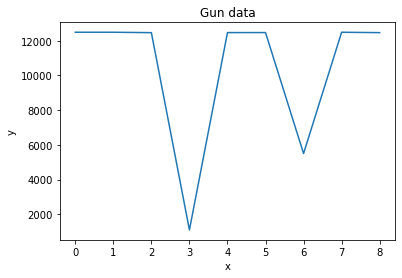

In [94]:
# Gun data from the year 1998 to the year 2017
x =[0, 1, 2, 3, 4, 5, 6, 7, 8]
y =[12485, 12485, 12461, 1100, 12465, 12466, 5500, 12485, 12462]
plt.plot(x, y)
plt.title("Gun data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [21]:
import pandas as pd

In [22]:
dataset = pd.read_excel('U.S-Census-data.xlsx')

In [25]:
dataset

,U.S Census data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300",741.894,"6,931,071","2,988,248","39,250,017","5,540,545","3,576,452",952.065,...,865454,6651194,"27,862,596","3,051,217",624.594,"8,411,808","7,288,000","1,831,102","5,778,708",585.501
2,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131",710.249,"6,392,301","2,916,025","37,254,522","5,029,324","3,574,114",897.936,...,814195,6346298,"25,146,100","2,763,888",625.741,"8,001,041","6,724,545","1,853,011","5,687,289",563.767
3,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
4,"Population, Census, April 1, 2010",NaN,"4,779,736",710.231,"6,392,017","2,915,918","37,253,956","5,029,196","3,574,097",897.934,...,814180,6346105,"25,145,561","2,763,885",625.741,"8,001,024","6,724,540","1,852,994","5,686,986",563.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [79]:
import matplotlib.pyplot as plt

In [26]:
type (dataset)

pandas.core.frame.DataFrame

In [35]:
import matplotlib.pyplot as plt

In [38]:
from matplotlib import pyplot as plt

In [36]:
dataset = pd.read_excel("gun_data.xlsx")

In [60]:
dataset.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [37]:
dataset

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


In [64]:
dataset.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

<AxesSubplot:>

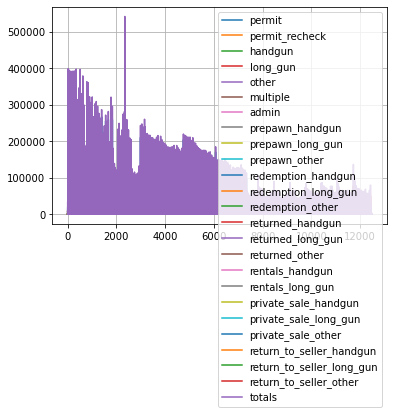

In [95]:
#This data below shows a chart of U.S census data from all the different states.
%matplotlib inline

dataset.plot(grid='on')

## Conclusions

There are multiple pre-permit checks per month in each state. And there are also monthly NICS background chekcks which sum up to the total of 24 years. Monthly NICS background checks started in the year 1998 on the month of November. And the findings above are an accumulation of those years.federal firearm licenses rely on the FBI for all firearm background checks by accessing the NICS electronically. There are thirty seven states that do not have (POC)point-of-contact status. There are thirteen full POC states that act on behalf of the NICS in a full POC capacity.There are four partial POC states that conduct handgun background checks and the FFLs contact the FBI for long gun background checks. Two partial POC states issue handgun permits used for handgun back ground checks, And the FFLs contact the FBI for long gun background checks.The federal firearms licenses has rules about firearms and explosives being procured and these rules are displayed where peopple go to procure handguns and explosives. The gun control act (GCA) which has categories which were established for persons who are prohibited from receiving firearms, was enacted by Congress as part of an effort to control gun violence. the following prohibits the transfer of firearms: • Persons who are convicted of a crime punishable by solitary confinement for a term exceeding a year, even if the sentence received was shorter. •Persons who are fugitives. Persons who have renounced their citizenship in the U.S, • Persons who are the subject of certain protection orders. •Persons who have been discharged from the U.S armed forces. These are a few rules from the federal licenses manual that prohibit customers from procuring explosives and gun. from the data that was gathered, these are tge findings. 

## Source: nics-firearms-licensee-manual-111811.pdf

## Source 2: nics-participation-map-august-2021.pdf